# 13 - Polynomial Interpolations

## 13.1 - Using Systems of Equations

Given $n + 1$ distinct data points $(x_0, y_0), \dots, (x_n, y_n)$, there exists a unique polynomial of degree at most $n$,

$$ P_n(x) = a_0 + a_1 x + \dots + a_n x^n, $$

that exactly fits these points, meaning $P_n(x_k) = y_k$ for each $k = 0, \dots, n$. The coefficients $a_k$ are to be determined, with each data point providing one equation in the system:

$$
\begin{align*}
    a_0 + a_1 x_0 + \dots + a_n x_0^n &= y_0 \\
    a_0 + a_1 x_1 + \dots + a_n x_1^n &= y_1 \\
    &\vdots \\
    a_0 + a_1 x_n + \dots + a_n x_n^n &= y_n
\end{align*}
$$

This system of equations can be correctly written as $A\textbf{a} = \textbf{y}$, where $\textbf{a} = [a_0, a_1, \dots, a_n]^T$ is the vector of unknown coefficients, $\textbf{y} = [y_0, y_1, \dots, y_n]^T$ is the vector of given $y$ values, and the coefficient matrix $A$, known as a **Vandermonde matrix**, is defined by

$$
A =
\begin{bmatrix}
    1 & x_0 & \dots & x_0^n \\
    1 & x_1 & \dots & x_1^n \\
    \vdots & \vdots & \ddots & \vdots \\
    1 & x_n & \dots & x_n^n
\end{bmatrix}
$$

The uniqueness of the polynomial is guaranteed provided that no two $x_k$ are the same, i.e., the $x_k$ are distinct. This theorem forms the basis of polynomial interpolation, a fundamental concept in numerical analysis and approximation theory.

### Example 1

To interpolate a polynomial through the data points $(-1, 1), (0, 1),$ and $(1, 3)$, we can use the Vandermonde matrix approach for polynomial interpolation. This method involves creating a Vandermonde matrix from the $x$ values of our data points and solving the linear system using `scipy.linalg.solve` to find the coefficients of the polynomial that fits these points.

In [1]:
import numpy as np

x = np.array([-1, 0, 1])
y = np.array([1, 1, 3])

A = np.vander(x, increasing=True)
A

array([[ 1, -1,  1],
       [ 1,  0,  0],
       [ 1,  1,  1]])

In [2]:
a = np.linalg.solve(A, y)
a

array([1., 1., 1.])

The array above contains the polynomial coefficients of the polynomial.

### Example 2

Find a cubic polynomial that interpolates the points $(0, 2), (1, 1), (2, 4),$ and $(3, -1)$.

The polynomial will be in the form

$$ p(x) = a_0 + a_1 x + a_2 x^2 + a_3 x^3 $$

where $a_0, a_1, a_2,$ and $a_3$ are the coefficients.

In [3]:
x = np.array([0, 1, 2, 3])
y = np.array([2, 1, 4, -1])

A = np.vander(x, increasing=True)

a = np.linalg.solve(A, y)

a

array([ 2., -7.,  8., -2.])

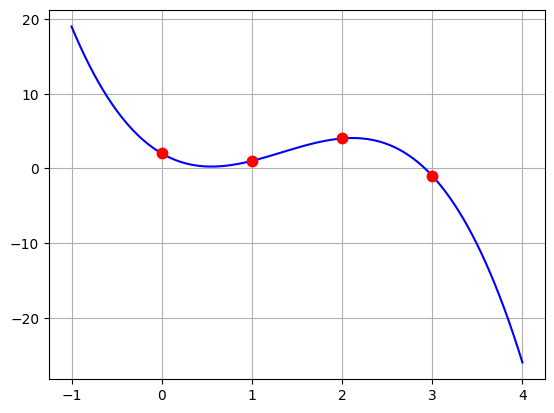

In [6]:
import matplotlib.pyplot as plt

x_vals = np.linspace(-1, 4, 100)
y_vals = a[0] + a[1] * x_vals + a[2] * x_vals**2 + a[3] * x_vals**3

plt.plot(x_vals, y_vals, 'b-')
plt.plot(x, y, 'r.', markersize=15)
plt.grid(True)
plt.show()

## 13.2 - Impact of Noise in Polynomial Interpolation

Polynomial interpolation can provide an accurate approximation of the underlying function. It's important to consider the presence of noise in real-world data, as it can significantly affect the interpolation results. Let's consider the following scenarios:

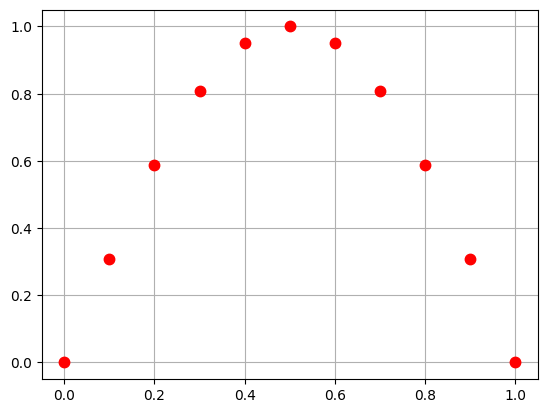

In [10]:
n = 10
x = np.linspace(0, 1, n + 1)
y = np.sin(np.pi * x)
plt.plot(x, y, 'r.', markersize=15)
plt.grid(True)
plt.show()

Now, we can interpolate to obtain a polynomial.

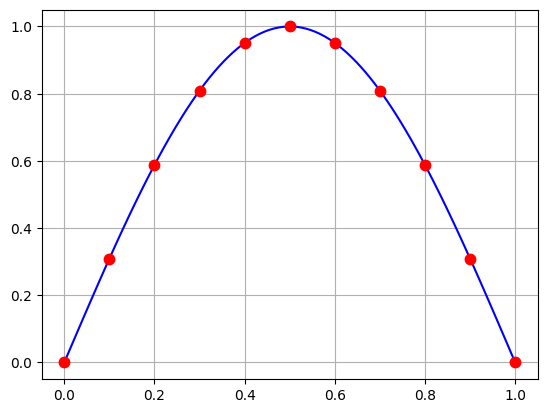

In [11]:
A = np.vander(x, increasing=True)
a = np.linalg.solve(A, y)
x_vals = np.linspace(0, 1, 100)
y_vals = sum([a[k] * x_vals**k for k in range(0, len(a))])
plt.plot(x_vals, y_vals, 'b-')
plt.plot(x, y, 'r.', markersize=15)
plt.grid(True)
plt.show()

Now, we introduce some noise, and the interpolated curve may not accurately approximate the original function.

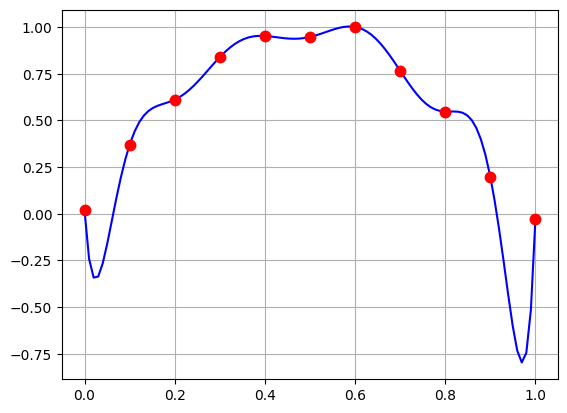

In [12]:
n = 10
x = np.linspace(0, 1, n + 1)
y = np.sin(np.pi * x) + 0.05 * np.random.randn(n + 1)
A = np.vander(x, increasing=True)
a = np.linalg.solve(A, y)
x_vals = np.linspace(0, 1, 100)
y_vals = sum([a[k] * x_vals**k for k in range(0, len(a))])
plt.plot(x_vals, y_vals, 'b-')
plt.plot(x, y, 'r.', markersize=15)
plt.grid(True)
plt.show()

In [13]:
import sympy as sp

x = sp.symbols('x')

polynomial = sum(v * x**i for i, v in enumerate(a))
polynomial

69884.3361094131*x**10 - 342333.658640144*x**9 + 716366.102605296*x**8 - 836330.190202585*x**7 + 596765.077522613*x**6 - 267989.784468008*x**5 + 75089.0217058981*x**4 - 12525.2994605241*x**3 + 1110.08508238036*x**2 - 35.7374986216382*x + 0.0187108577173799

## 13.3 - Sensitivity of Polynomial Interpolations

Polynomial interpolation is sensitive to noise and small perturbations in the data. The condition number of the Vandermonde matrix (or other matrices involved in interpolation methods) can be high when the degree of the polynomial is large enough. High condition numbers indicate that the matrix is ill-conditioned, meaning that small changes in the input data can lead to large changes in the solution. As a result, even minor variations in the data can cause instability in the interpolation process, leading to inaccurate results.

We can check the condition of the Vandermonde matrix above.

In [14]:
np.linalg.cond(A)

115575244.52219748

## 13.4 - Lagrange Interpolation

The Lagrange interpolation is a method of polynomial interpolation that provides a polynomial of degree at most $n$ that passes through $n+1$ given points in the plane. These points are assumed to have distinct $x$ coordinates, $x_0, x_1, \dots, x_n$, and corresponding $y$ coordinates, $y_0, y_1, \dots, y_n$. The resulting polynomial fits the given points and can be used to estimate values between these points or to model the underlying function that these points may represent.

The Lagrange interpolation polynomial is defined as:

$$ p(x) = \sum^n_{i=0} y_i * l_i(x), $$

where $l_i(x)$ are the Lagrange basis polynomials for each $i$, defined by:

$$ l_i(x) = \prod^n_{\substack{0 \leq j \leq n \\ j \neq i}} \frac{x - x_j}{x_i - x_j} $$

Each $l_i(x)$ is a polynomial of degree $n$ that is $1$ at $x_i$ and $0$ at all other $x_j$ for $j \neq i$. These polynomials $l_i(x)$ form a basis for the vector space of polynomials of degree at most $n$.

In [7]:
import sympy as sp

def lagrange_basis(x_values, i, x_var=sp.symbols('x')):
    l = 1
    x_i = x_values[i]
    for j, x_j in enumerate(x_values):
        if j != i:
            l *= (x_var - x_j) / (x_i - x_j)
    return l

In [8]:
def lagrange_interpolation(x_values, y_values):
    px = 0
    for i, y_i in enumerate(y_values):
        px += y_i * lagrange_basis(x_values, i)
    return px

In [9]:
x_values = np.array([0, 1, 2, 3])
y_values = np.array([2, 1, 4, -1])
px = lagrange_interpolation(x_values, y_values)
px

x*(3/2 - x/2)*(2 - x) + 2*x*(3 - x)*(x - 1) - x*(x/2 - 1/2)*(x - 2)/3 + 2*(1 - x)*(1 - x/2)*(1 - x/3)

## 13.5 - Newton Interpolations

Newton's nested interpolation formula is a method similar to Lagrange interpolation for approximating a function or interpolating a set of data points.

For $n = 1$, we have two data points $(x_0, y_0)$ and $(x_1, y_1)$. The interpolating polynomial $P(x)$ can be represented as:

$$ P_1(x) = a_0 + a_1(x - x_0) $$

Now, let's assume that the formula is determined for $P_k$. We add a new data point $(x_{k+1}, y_{k+1})$. The interpolating polynomial $P_k(x)$ can be written as

$$ P_k(x) = P_{k-1}(x) + a_k(x - x_0) \cdot (x - x_1) \cdot \dots \cdot (x - x_{k-1}). $$

Notice that $a_k$ can be determined by

$$ a_k = \frac{y_k - \sum^{k-1}_{i=0} a_i \prod^{i-1}_{j=0} (x_k - x_j)}{\prod^{k-1}_{j=0} (x_k - x_j)}. $$

## 13.6 - Divided Differences

We can get a better performance by using the divided difference.

### Initialize

- Start by initializing an array to store the divided differences.
- Set $f[x_0] = y_0,$ where $y_0$ is the function value at $x_0$.

### Compute Higher-Order Divided Differences

- For each higher-order divided difference $f[x_0, x_1, \dots, x_k]$, use the formula:

  $$ f[x_0, x_1, \dots, x_k] = \frac{f[x_1, x_2, \dots, x_k] - f[x_0, x_1, \dots, x_{k-1}]}{x_k - x_0} $$

- Continue this process until all divided differences are computed.

In [15]:
def divided_differences(x_values, y_values):
    n = len(x_values)
    coefficients = np.copy(y_values)
    for j in range(1, n):
        for i in range(n - 1, j - 1, -1):
            coefficients[i] = (coefficients[i] - coefficients[i - 1]) / (
                x_values[i] - x_values[i - j]
            )
    return coefficients

In [17]:
def newton_interpolation(x_values, y_values, x=sp.symbols('x')):
    coefficients = divided_differences(x_values, y_values)
    n = len(x_values)
    px = coefficients[n - 1]
    for i in range(n - 2, -1, -1):
        px = px * (x - x_values[i]) + coefficients[i]
    return px

In [18]:
x_values = np.array([0, 1, 2, 3])
y_values = np.array([2, 1, 4, -1])
px = newton_interpolation(x_values, y_values)
px

x*((6 - 2*x)*(x - 1) - 1) + 2